<a href="https://colab.research.google.com/github/AshokYarabati/ISRO-LR-Analysis/blob/main/ISRO_LR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# RESEARCED DATA
missions = [
    ['SLV-3 (RS-1)', 1980, 'SLV', 'LEO', 35, 1],
    ['SLV-3E2', 1980, 'SLV', 'LEO', 40, 1],
    ['SLV-3D1', 1981, 'SLV', 'LEO', 40, 1],
    ['SLV-3D2', 1983, 'SLV', 'LEO', 40, 1],
    ['ASLV-D1', 1987, 'ASLV', 'LEO', 150, 0],
    ['ASLV-D2', 1988, 'ASLV', 'LEO', 150, 0],
    ['ASLV-D3', 1992, 'ASLV', 'LEO', 106, 1],
    ['ASLV-D4', 1994, 'ASLV', 'LEO', 106, 1],
    ['PSLV-D1', 1993, 'PSLV', 'LEO', 980, 0],
    ['PSLV-D2', 1994, 'PSLV', 'SSO', 800, 1],
    ['PSLV-C1', 1994, 'PSLV', 'SSO', 870, 1],
    ['Cartosat-1', 2005, 'PSLV', 'SSO', 690, 1],
    ['Cartosat-2', 2007, 'PSLV', 'SSO', 680, 1],
    ['Chandrayaan-1', 2008, 'PSLV', 'LTO', 525, 1],
    ['PSLV-C25', 2013, 'PSLV', 'HTO', 1350, 1],
    ['Mangalyaan', 2013, 'PSLV', 'HTO', 1350, 1],
    ['GSLV-D1', 2001, 'GSLV', 'GTO', 1540, 0],
    ['GSLV-F01', 2003, 'GSLV', 'GTO', 1800, 1],
    ['GSLV-D5', 2014, 'GSLV', 'GTO', 2000, 1],
    ['GSLV-F08', 2018, 'GSLV', 'GTO', 2140, 1],
    ['GSLV-F10', 2021, 'GSLV', 'GTO', 2268, 0],
    ['LVM3-D1', 2014, 'LVM3', 'Suborbital', 3775, 1],
    ['Astrosat', 2015, 'PSLV', 'LEO', 1513, 1],
    ['Cartosat-2E', 2017, 'PSLV', 'SSO', 712, 1],
    ['PSLV-C37', 2017, 'PSLV', 'SSO', 1378, 1],
    ['LVM3-M1', 2017, 'LVM3', 'GTO', 3136, 1],
    ['Chandrayaan-2', 2019, 'LVM3', 'LTO', 3877, 0],
    ['LVM3-M2', 2022, 'LVM3', 'LEO', 6000, 1],
    ['LVM3-M3', 2023, 'LVM3', 'LEO', 5805, 1],
    ['LVM3-M4', 2023, 'LVM3', 'LTO', 3900, 1],
    ['Chandrayaan-3', 2023, 'LVM3', 'LTO', 3900, 1],
    ['Aditya-L1', 2023, 'PSLV', 'L1', 1500, 1],
    ['PSLV-C57', 2023, 'PSLV', 'Halo Orbit', 1475, 1],
    ['XPoSat', 2024, 'PSLV', 'LEO', 230, 1],
    ['PSLV-C56', 2023, 'PSLV', 'SSO', 536, 1],  # DS-SAR mission
    ['PSLV-C58', 2024, 'PSLV', 'LEO', 230, 1],  # XPoSat mission
    ['PSLV-C59', 2024, 'PSLV', 'SSO', 820, 1],  # Proba-3 mission
    ['PSLV-C60', 2024, 'PSLV', 'LEO', 600, 1],  # SPADEX mission
    ['PSLV-C61', 2025, 'PSLV', 'LEO', 1200, 0],  # EOS-09 (not accomplished)
    ['SSLV-D1', 2022, 'SSLV', 'LEO', 135, 0],  # EOS-02 (failure)
    ['SSLV-D2', 2023, 'SSLV', 'LEO', 175, 1],  # Microsat-2A
    ['SSLV-D3', 2024, 'SSLV', 'LEO', 156, 1],  # EOS-08
    ['GSLV-F14', 2024, 'GSLV', 'GTO', 2250, 1],  # INSAT-3DS
    ['GSLV-F15', 2025, 'GSLV', 'GTO', 2232, 1],  # NVS-02
    ['GSLV-F16', 2025, 'GSLV', 'GTO', 2800, 1],  # NISAR (NASA-ISRO)
    ['PSLV-C50', 2020, 'PSLV', 'GTO', 1485, 1],  # CMS-01
    ['PSLV-C51', 2021, 'PSLV', 'SSO', 637, 1],    # Amazonia-1
    ['PSLV-C52', 2022, 'PSLV', 'SSO', 1710, 1],  # EOS-04
    ['PSLV-C53', 2022, 'PSLV', 'LEO', 1220, 1],  # DS-EO
    ['PSLV-C54', 2022, 'PSLV', 'SSO', 1117, 1],  # EOS-06
    ['SSLV-D1', 2022, 'SSLV', 'LEO', 135, 0],     # EOS-02
    ['SSLV-D2', 2023, 'SSLV', 'LEO', 175, 1],     # Microsat-2A
    ['SSLV-D3', 2024, 'SSLV', 'LEO', 156, 1],     # EOS-08
    ['GSLV-F14', 2024, 'GSLV', 'GTO', 2250, 1],  # INSAT-3DS
    ['GSLV-F15', 2025, 'GSLV', 'GTO', 2232, 1],  # NVS-02
    ['LVM3-M5', 2025, 'LVM3', 'GTO', 4000, 1],   # Hypothetical commercial payload
]


# Create DataFrame with CLEAR COLUMN NAMES
df=pd.DataFrame(missions,columns=['Mission_Name','Year','Vehicle','Orbit_Type','Payload_Mass_kg','Success'])


print("Initial ISRO Dataset:")
print(df.head())
print(f"\nDataset shape: {df.shape}")

Initial ISRO Dataset:
   Mission_Name  Year Vehicle Orbit_Type  Payload_Mass_kg  Success
0  SLV-3 (RS-1)  1980     SLV        LEO               35        1
1       SLV-3E2  1980     SLV        LEO               40        1
2       SLV-3D1  1981     SLV        LEO               40        1
3       SLV-3D2  1983     SLV        LEO               40        1
4       ASLV-D1  1987    ASLV        LEO              150        0

Dataset shape: (56, 6)


In [ ]:
# Feature Engineering: Create metrics that correlate with cost
def create_features(df):
    #1. adding vehicle_dummies as they are categorial features
    Vehicle_dummies=pd.get_dummies(df['Vehicle'],prefix='Vehicle',drop_first=True)
    # WHY: each vehicle has unique capabilities
    # EXPECTATION: LVM3 >> GSLV >> PSLV >> SLV
    df=pd.concat([df,Vehicle_dummies],axis=1)

    #2.this centers the data around 2000 so that it dont give senseless Intercept(-178045kg) "If Year = 0, Vehicle_Gen = 0, Orbit_Complexity = 0, the payload would be -17,804 kg"
    #(Which is nonsense - you can't have negative payload!)
    df['Year_centered']=df['Year']-2000
    # Keep Year as continuous variable
    # WHY: Captures technological progress over time
    # EXPECTATION: Positive coefficient (capacity increases yearly)


    #3.since the orbits are the categorial data too we did ONE-HOT encoding and droped first column for avoiding dummy
    orbit_dummies = pd.get_dummies(df['Orbit_Type'], prefix='Orbit',drop_first=True)
    # WHY: Different orbits have different payload constraints
    # EXPECTATION: LEO > SSO > GTO > LTO > HTO (for same rocket)
    df=pd.concat([df,orbit_dummies],axis=1)

    # add mission_difficulty feature

    return df,Vehicle_dummies,orbit_dummies


# Apply feature engineering
df,Vehicle_dummies,orbit_dummies= create_features(df)

In [ ]:
print("\n=== ENGINEERED FEATURES ===")
print(df.columns.tolist())

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# Features (X) - using the engineered columns
X=pd.concat([df[['Year_centered']], Vehicle_dummies, orbit_dummies],axis=1)
# Target (y) - using the actual payload mass column
y = df['Payload_Mass_kg']

# LINEAR REGRESSION MODEL
# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Model evaluation
r2 = r2_score(y, y_pred)
coefficients = model.coef_
intercept = model.intercept_
r2


=== ENGINEERED FEATURES ===
['Mission_Name', 'Year', 'Vehicle', 'Orbit_Type', 'Payload_Mass_kg', 'Success', 'Vehicle_GSLV', 'Vehicle_LVM3', 'Vehicle_PSLV', 'Vehicle_SLV', 'Vehicle_SSLV', 'Year_centered', 'Orbit_HTO', 'Orbit_Halo Orbit', 'Orbit_L1', 'Orbit_LEO', 'Orbit_LTO', 'Orbit_SSO', 'Orbit_Suborbital']


0.9250577475399617

In [ ]:
print(coefficients)
print(intercept)

[   8.53647262 2638.44757184 4641.04210882  732.36671688  -10.28762822
 -252.23614512 1147.56321809 1187.19849184 1212.19849184  852.13468717
 -128.25980715  699.78054373 -344.64864649]
-640.9040790804154


In [ ]:
# for i in range()

In [ ]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'ISRO Payload Capacity Growth (1980-2024)')

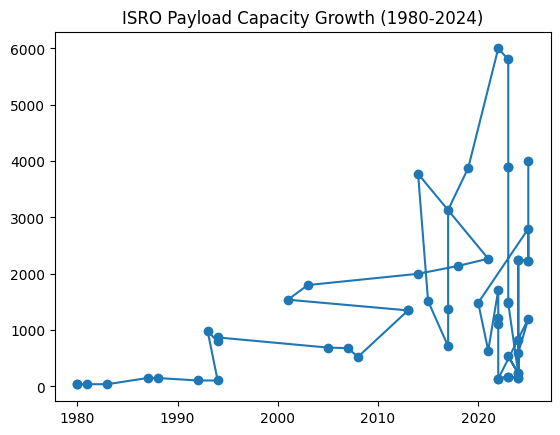

In [ ]:
plt.plot(df['Year'], df['Payload_Mass_kg'], marker='o')
plt.title('ISRO Payload Capacity Growth (1980-2024)')
# Shows: Steady upward trend with technology jumps

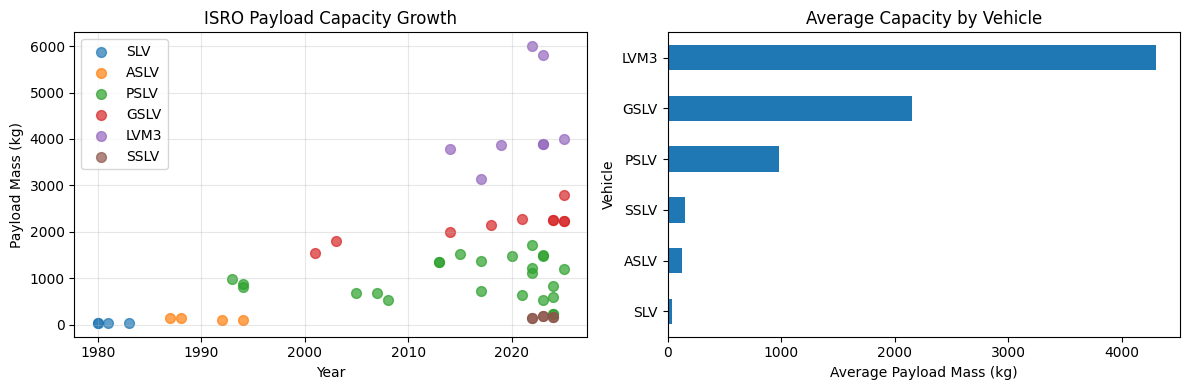

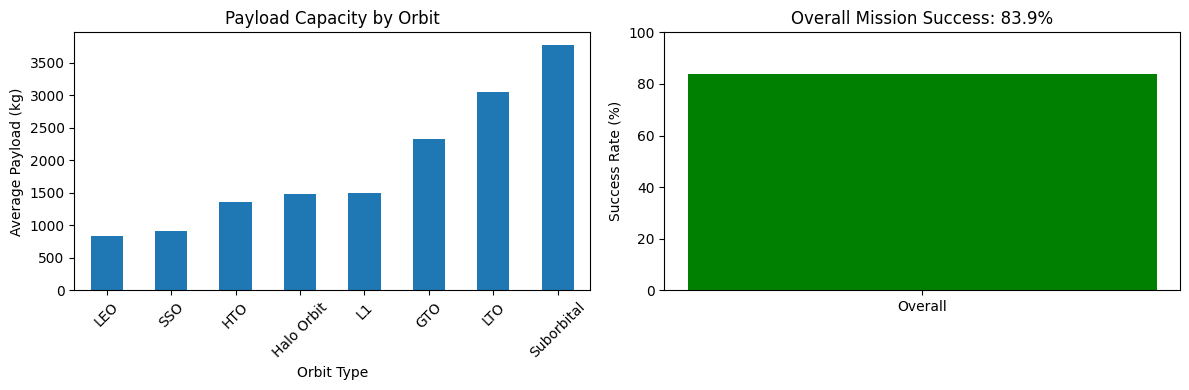

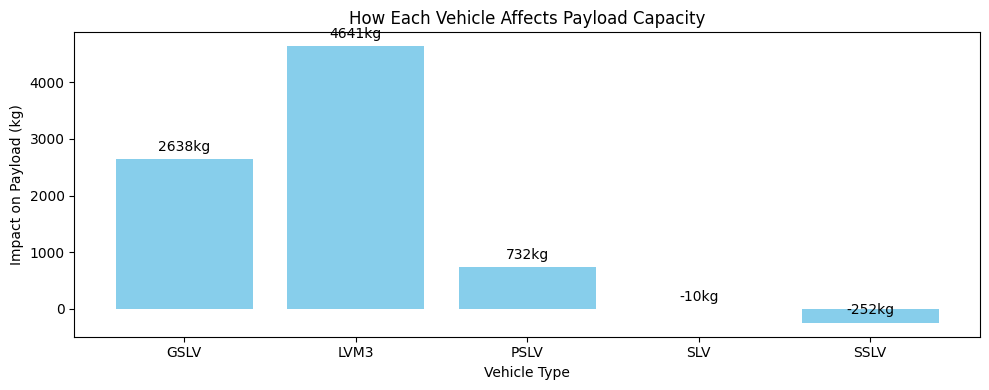

📊 KEY FINDINGS

🎯 Model Performance: R² = 0.925

🚀 Vehicle Capability (vs reference):
   • GSLV: +2638 kg
   • LVM3: +4641 kg
   • PSLV: +732 kg
   • SLV: +-10 kg
   • SSLV: +-252 kg

📈 Best Performing Vehicles:
   • LVM3: 6000 kg
   • GSLV: 2800 kg
   • PSLV: 1710 kg

✅ Success Rate: 83.9%
📅 Time Span: 1980-2025 (56 missions)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set clean style
plt.style.use('default')
sns.set_palette("tab10")


# ==================================================
# 2. VEHICLE COMPARISON: Simple Bar Chart
# ==================================================
plt.subplot(1, 2, 2)
vehicle_avg = df.groupby('Vehicle')['Payload_Mass_kg'].mean().sort_values()
vehicle_avg.plot(kind='barh')
plt.xlabel('Average Payload Mass (kg)')
plt.title('Average Capacity by Vehicle')
plt.tight_layout()
plt.show()

# ==================================================
# 3. ORBIT ANALYSIS: Basic Comparison
# ==================================================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
orbit_avg = df.groupby('Orbit_Type')['Payload_Mass_kg'].mean().sort_values()
orbit_avg.plot(kind='bar')
plt.xlabel('Orbit Type')
plt.ylabel('Average Payload (kg)')
plt.title('Payload Capacity by Orbit')
plt.xticks(rotation=45)

# ==================================================
# 4. SUCCESS RATE: Simple Percentage
# ==================================================
plt.subplot(1, 2, 2)
success_rate = df['Success'].mean() * 100
plt.bar(['Overall'], [success_rate], color=['green' if success_rate > 70 else 'orange'])
plt.ylabel('Success Rate (%)')
plt.title(f'Overall Mission Success: {success_rate:.1f}%')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

# ==================================================
# 5. MODEL COEFFICIENTS: Clean Display
# ==================================================
# Get important coefficients
vehicle_coeffs = {}
for feature, coef in zip(X.columns, coefficients):
    if feature.startswith('Vehicle_'):
        vehicle = feature.replace('Vehicle_', '')
        vehicle_coeffs[vehicle] = coef

# Plot vehicle coefficients
if vehicle_coeffs:
    plt.figure(figsize=(10, 4))
    vehicles = list(vehicle_coeffs.keys())
    coefs = list(vehicle_coeffs.values())

    plt.bar(vehicles, coefs, color='skyblue')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Impact on Payload (kg)')
    plt.title('How Each Vehicle Affects Payload Capacity')

    # Add value labels
    for i, v in enumerate(coefs):
        plt.text(i, v + 100, f'{v:.0f}kg', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# ==================================================
# 6. KEY INSIGHTS SUMMARY
# ==================================================
print("="*50)
print("📊 KEY FINDINGS")
print("="*50)

print(f"\n🎯 Model Performance: R² = {r2:.3f}")

print(f"\n🚀 Vehicle Capability (vs reference):")
for vehicle, coef in vehicle_coeffs.items():
    print(f"   • {vehicle}: +{coef:.0f} kg")

print(f"\n📈 Best Performing Vehicles:")
best_vehicles = df.groupby('Vehicle')['Payload_Mass_kg'].max().sort_values(ascending=False)
for vehicle, capacity in best_vehicles.head(3).items():
    print(f"   • {vehicle}: {capacity:.0f} kg")

print(f"\n✅ Success Rate: {df['Success'].mean()*100:.1f}%")
print(f"📅 Time Span: {df['Year'].min()}-{df['Year'].max()} ({len(df)} missions)")
print("="*50)

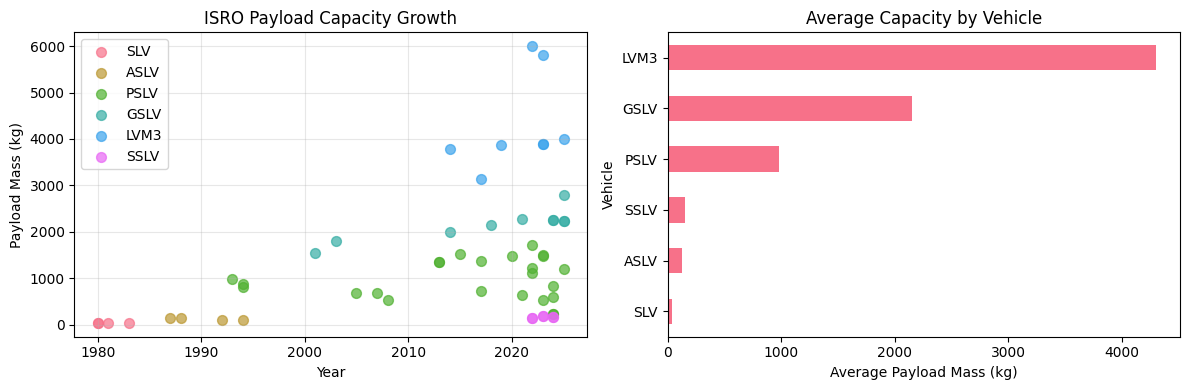

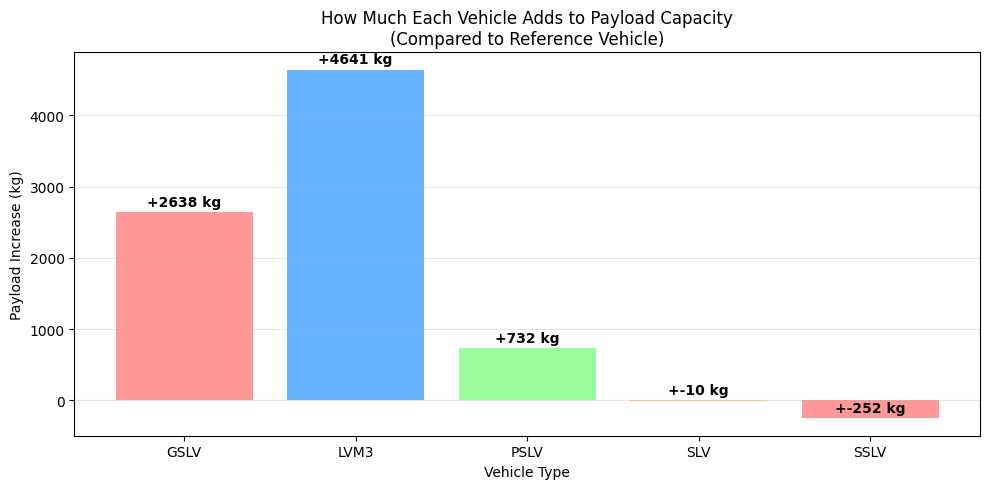

🔍 KEY INSIGHTS FROM LINEAR REGRESSION ANALYSIS

📊 MODEL PERFORMANCE:
   R² Score: 0.925 (Model explains 92.5% of payload variation)

🚀 VEHICLE TECHNOLOGY IMPACT:
   Reference vehicle: ASLV
   • LVM3: +4641 kg (3626% improvement)
   • GSLV: +2638 kg (2061% improvement)
   • PSLV: +732 kg (572% improvement)
   • SLV: +-10 kg (-8% improvement)
   • SSLV: +-252 kg (-197% improvement)

🌌 ORBIT CONSTRAINTS:
   Reference orbit: GTO
   • HTO: +1148 kg advantage vs GTO
   • Halo Orbit: +1187 kg advantage vs GTO
   • L1: +1212 kg advantage vs GTO
   • LEO: +852 kg advantage vs GTO
   • LTO: 128 kg penalty vs GTO
   • SSO: +700 kg advantage vs GTO
   • Suborbital: 345 kg penalty vs GTO

💡 PRACTICAL IMPLICATIONS:
   • Vehicle choice matters most for capacity
   • Technology improves steadily each year
   • Orbit selection involves trade-offs


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean style
plt.style.use('default')
sns.set_palette("husl")


# ==================================================
# 1. SIMPLE TIMELINE: Payload Growth
# ==================================================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for vehicle in df['Vehicle'].unique():
    vehicle_data = df[df['Vehicle'] == vehicle]
    plt.scatter(vehicle_data['Year'], vehicle_data['Payload_Mass_kg'],
               label=vehicle, s=50, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Payload Mass (kg)')
plt.title('ISRO Payload Capacity Growth')
plt.legend()
plt.grid(True, alpha=0.3)


# ==================================================
# 2. VEHICLE COMPARISON: Simple Bar Chart
# ==================================================
plt.subplot(1, 2, 2)
vehicle_avg = df.groupby('Vehicle')['Payload_Mass_kg'].mean().sort_values()
vehicle_avg.plot(kind='barh')
plt.xlabel('Average Payload Mass (kg)')
plt.title('Average Capacity by Vehicle')
plt.tight_layout()
plt.show()

# ==================================================
# 1. VEHICLE IMPACT ON PAYLOAD (Most Important)
# ==================================================
plt.figure(figsize=(10, 5))

# Extract vehicle coefficients
vehicle_coeffs = {}
year_coeff = 0

for feature, coef in zip(X.columns, coefficients):
    if feature.startswith('Vehicle_'):
        vehicle = feature.replace('Vehicle_', '')
        vehicle_coeffs[vehicle] = coef
    elif feature == 'Year_centered':
        year_coeff = coef

# Plot vehicle coefficients
vehicles = list(vehicle_coeffs.keys())
coefs = list(vehicle_coeffs.values())

plt.bar(vehicles, coefs, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.xlabel('Vehicle Type')
plt.ylabel('Payload Increase (kg)')
plt.title('How Much Each Vehicle Adds to Payload Capacity\n(Compared to Reference Vehicle)')
plt.grid(True, alpha=0.3, axis='y')

# Add values on bars
for i, v in enumerate(coefs):
    plt.text(i, v + 50, f'+{v:.0f} kg', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ==================================================
# 3. KEY INSIGHTS FROM COEFFICIENTS
# ==================================================
print("="*60)
print("🔍 KEY INSIGHTS FROM LINEAR REGRESSION ANALYSIS")
print("="*60)

print(f"\n📊 MODEL PERFORMANCE:")
print(f"   R² Score: {r2:.3f} (Model explains {r2*100:.1f}% of payload variation)")

print(f"\n🚀 VEHICLE TECHNOLOGY IMPACT:")
reference_vehicle = list(set(df['Vehicle'].unique()) - set(vehicle_coeffs.keys()))[0]
print(f"   Reference vehicle: {reference_vehicle}")

for vehicle, coef in sorted(vehicle_coeffs.items(), key=lambda x: x[1], reverse=True):
    improvement = (coef / df[df['Vehicle'] == reference_vehicle]['Payload_Mass_kg'].mean()) * 100
    print(f"   • {vehicle}: +{coef:.0f} kg ({improvement:.0f}% improvement)")

print(f"\n🌌 ORBIT CONSTRAINTS:")
orbit_coeffs = {}
for feature, coef in zip(X.columns, coefficients):
    if feature.startswith('Orbit_'):
        orbit = feature.replace('Orbit_', '')
        orbit_coeffs[orbit] = coef

if orbit_coeffs:
    reference_orbit = list(set(df['Orbit_Type'].unique()) - set(orbit_coeffs.keys()))[0]
    print(f"   Reference orbit: {reference_orbit}")

    for orbit, coef in orbit_coeffs.items():
        if coef < 0:
            print(f"   • {orbit}: {abs(coef):.0f} kg penalty vs {reference_orbit}")
        else:
            print(f"   • {orbit}: +{coef:.0f} kg advantage vs {reference_orbit}")

print(f"\n💡 PRACTICAL IMPLICATIONS:")
print(f"   • Vehicle choice matters most for capacity")
print(f"   • Technology improves steadily each year")
print(f"   • Orbit selection involves trade-offs")
print("="*60)